In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=16)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

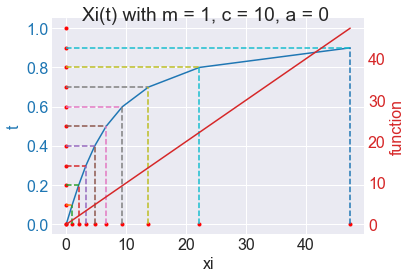

In [2]:
def Xi(t, a, m, c):
    return a + c*t / (1 - t**2)**m


def function(x):
    return x


def derivative(f, x0, dx, a, c, m):
    return (f(x0+dx, a, m, c) - f(x0-dx, a, m, c)) / (2*dx)


def PrintTriangular(mas, i, lines=None):
    if lines is None:
        lines = len(mas)
        
    for line in range(lines):
        for n in range(line + 1 - i):
            print('{0:7.4f}'.format(mas[line][n]), end=' ')
        print()
            


a = 0
b = 1.
N = 10
t = np.linspace(a, b, N+1)

fig = plt.figure()

m = 1
c = 10
xi = Xi(t, a, m, c)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('t', color=color)
ax1.set_xlabel('xi')
ax1.plot(xi, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(xi, np.zeros(N+1), 'or', markersize=3)
ax1.plot(np.zeros(N+1), t, 'or', markersize=3)

ax1.plot([[0]*(N+1), xi], [t, t], '--')
ax1.plot([xi, xi], [[0]*(N+1), t], '--')
ax1.grid(lw=1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('function', color=color)  # we already handled the x-label with ax1
ax2.plot(xi, function(xi), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


fig.suptitle('Xi(t) with m = {}, c = {}, a = {}'.format(m, c, a))

plt.show()

---

**Описание переменных:**
  - ```func``` -  интегрируемая функци
  - ```xi = xi(t)``` - квазиравномерная сетка (функция), ```m``` и ```c``` - подгоночные параметры
  - ```a``` - точка начала интегрирования (при ```start=0```)
  - ```start = 0``` -> интегрируем от ```а``` до ```+inf```
  - ```start = -1``` -> интегрируем от ```-inf``` до ```+inf```
  - ```p``` - точность метода на первом шаге
  - ```q``` - добавочная точность метода при уточнении решения
  - ```N``` - начальный размер сетки
  - ```r``` - рост сетки
  - ```S``` - максимальное увеличение сетки 

In [3]:
def Integration(u, N, xi, a, start, m, c):
    tay = (-2*start | 1) / N
    t = linspace(start, 1, N+1)
    
    integral = 0.
    for n in range(1, N+1):
        t0 = (t[n] + t[n-1])/2
        dt = (t[n] - t[n-1])/20
        h = derivative(xi, t0, dt, a, m, c)*tay
        
        integral = integral + u(t0) / 2*h 
        
    return integral


def RicherdsonExtrapolation(func, xi, m=1, c=1, EPS=10, a=0, start=0, p=2, q=2, r=2, N=2, S=15):
    U = np.zeros((S,S))
    R = np.zeros((S,S))
    p_eff = np.zeros((S,S))

    s = 1
    U[0][0] = Integration(func, N, xi, a, start, m, c)
    while True:
        U[s][0] = Integration(func, r**s*N, xi, a, start, m, c)

        for n in range(s):
            R[s][n] = (U[s][n] - U[s-1][n]) / (r**(p + n*q) - 1)
            
            p_eff[s][n] = log(abs(R[s-1][n]/R[s][n])) / log(r)
            
            U[s][n + 1] = U[s][n] + R[s][n]
            
            if abs(R[s][n]) < (0.1)**EPS:
                return (U[s][n], R[s][n], p_eff[s][n], p*(s-1)+n*q | p, s, n, U, R, p_eff)

            
        
        s += 1
        if s > 14: 
            return (U[s-1][s-1], R[s-1][s-1], p_eff[s-1][s-3], p + s*q, s, s, U, R, p_eff)


ans = RicherdsonExtrapolation(function, Xi, EPS=1, m=1, c=10)
print('Ответ: {0:12.10f}\nПогрешность: {1:12.10f}\nЭффективный порядок точности: {2:7.10f}\nТеоретический порядок точности: {3:7.5f}'.format(ans[0], ans[1], ans[2], ans[3]), end=' ')


Ответ: 25721456797554121908668785440108657266961416192.0000000000
Погрешность: 0.0000000000
Эффективный порядок точности: -9.9999455698
Теоретический порядок точности: 32.00000 

In [4]:
print('Метод останавливается на {} шаге'.format(ans[4]))

Метод останавливается на 15 шаге
